## Exploración de datos: accesos de internet por provincia y tecnología

### Índice
1. [Descripción de los datos ](#id1)
2. [Outliers](#id2)
3. [Análisis y visualización de los datos](#id3)
4. [Conclusión](#id4)


### 1. Descripción de los datos<a name="id1"></a>
Se describen la cantidad de registros y columnas con sus tipos de datos, ocupación en memoria y una estadística descriptiva de los mismos: cúal es el promedio, el desvío estándar, los cuartiles, todos medidas de tendencia central.

In [32]:
# Se importa las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt 

In [33]:
df = pd.read_csv('../datasets/Internet_Accesos-por-tecnologiayporprovincia.csv', delimiter=';')

In [34]:
df.head(20)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778
5,2022,3,Córdoba,163770,465461,338570,61070,9797,1038668
6,2022,3,Corrientes,36508,77140,18619,7256,5323,144846
7,2022,3,Entre Ríos,60345,132952,36971,26098,12593,268959
8,2022,3,Formosa,14470,25880,11041,16935,212,68538
9,2022,3,Jujuy,19257,52978,40172,4033,2383,118823


In [35]:
# se averigua cuántos registros hay: 840 registros
df.shape[0]

840

In [36]:
# Se observa por columna: la cantidad de registro, el tipo de dato y si tiene valores nulos o no. 
# También se observa el uso de memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    object
 1   Trimestre     840 non-null    object
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    int64 
 4   Cablemodem    840 non-null    int64 
 5   Fibra óptica  840 non-null    int64 
 6   Wireless      840 non-null    int64 
 7   Otros         840 non-null    int64 
 8   Total         840 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 59.2+ KB


In [37]:
df['Año'].unique() # Se ve los distintos valores para la categoria Año

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014'], dtype=object)

Se observa que para Año hay registros con valor 2019 y 2019 *. Según la fuente de datos de ENACOM, se refiere a que los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico. Se va reemplazar 2019* por 2019.

In [38]:
df.loc[df['Año'] == '2019 *', 'Año'] = '2019'

In [9]:
print(df['Año'].unique())

['2022' '2021' '2020' '2019' '2018' '2017' '2016' '2015' '2014']


In [39]:
df['Trimestre'].unique() # Se ve los distintos valores para la categoria trimestre

array(['3', '2', '1', '4', '3 *', '2 *', '1 *'], dtype=object)

En este caso se hace lo mismo para 3 *, 2 * y 1 *.

In [40]:
df.loc[df['Trimestre'] == '3 *', 'Trimestre'] = '3'
df.loc[df['Trimestre'] == '2 *', 'Trimestre'] = '2'
df.loc[df['Trimestre'] == '1 *', 'Trimestre'] = '1'

In [41]:
df['Trimestre'].unique() 

array(['3', '2', '1', '4'], dtype=object)

In [42]:
df['Provincia'].unique() 

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [43]:
# Corregido lo anterior en Año y Trimeste, ahora se pasan algunas variables a categoricas
df['Año']           = df['Año'].astype('category')
df['Trimestre']     = df['Trimestre'].astype('category')
df['Provincia']     = df['Provincia'].astype('category')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Año           840 non-null    category
 1   Trimestre     840 non-null    category
 2   Provincia     840 non-null    category
 3   ADSL          840 non-null    int64   
 4   Cablemodem    840 non-null    int64   
 5   Fibra óptica  840 non-null    int64   
 6   Wireless      840 non-null    int64   
 7   Otros         840 non-null    int64   
 8   Total         840 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 43.3 KB


In [45]:
df.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,8.400000e+02,8.400000e+02,8.400000e+02,840.000000,840.000000,8.400000e+02
mean,1.275668e+05,1.717750e+05,2.991186e+04,10345.001190,6142.961905,3.457417e+05
std,2.550543e+05,4.221661e+05,1.235013e+05,18192.024086,10572.152928,7.419436e+05
min,6.842000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2.247925e+04,8.599750e+03,1.860000e+02,253.000000,307.250000,5.202975e+04
50%,4.859600e+04,3.498400e+04,1.093000e+03,4261.500000,1852.000000,1.034895e+05
75%,1.045695e+05,7.074850e+04,1.386250e+04,12435.000000,6915.500000,1.779148e+05
max,1.586343e+06,2.748325e+06,1.436433e+06,126887.000000,73415.000000,4.721668e+06


Se puede observar que hay valores cero, primer supuesto analizado es que posiblemente en algunas provincias no hay acceso por cable modem, por fibra óptica ni wireless. O que esos datos se corresponden a años en donde no se utilizaban esas tecnologías, o no llegaban a algunas provincias.

In [46]:
df.isnull().sum()
# Con esto se verifica que no existen nulos

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

### 2. Outliers<a name="id2"></a>
Detección de valores atípicos.

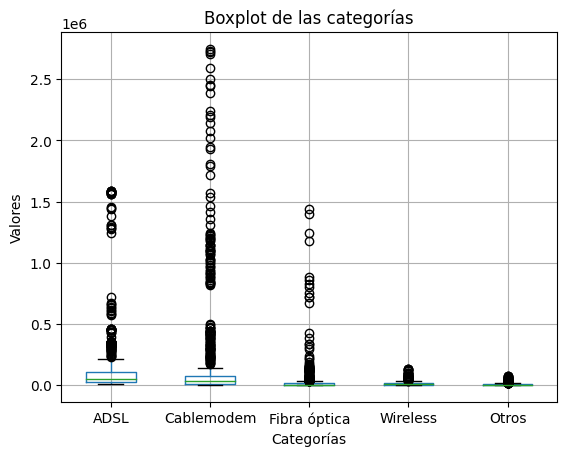

In [33]:
# Se averigua datos outliers, se crea boxplot para las columnas de interés
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

df[columnas].boxplot()

plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Boxplot de las categorías')

plt.show()

Con el gráfico de cajas, se puede observar valores atipicos en todos las tecnologías de acceso a internet. Se averigua cúales son esos registros mediante el **método de de Tukey's fences**, sin eliminarnos.

In [65]:
# Outliers de tecnología de acceso por ADSL 

Q1 = df['ADSL'].quantile(0.25)
Q3 = df['ADSL'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'ADSL'
outliers = df.loc[(df['ADSL'] < limite_inferior) | (df['ADSL'] > limite_superior)]
print('limite_inferior', limite_inferior , ' y limite_superior', limite_superior)
print(outliers)

limite_inferior -100656.125  y limite_superior 227704.875
      Año Trimestre        Provincia     ADSL  Cablemodem  Fibra óptica  \
0    2022         3     Buenos Aires   339648     2748325       1436433   
24   2022         2     Buenos Aires   350652     2719613       1399043   
48   2022         1     Buenos Aires   392045     2728865       1242121   
72   2021         4     Buenos Aires   426325     2706506       1176024   
92   2021         4         Santa Fe   233427      444373        128856   
..    ...       ...              ...      ...         ...           ...   
812  2014         2         Santa Fe   324101      178495          3085   
816  2014         1     Buenos Aires  1567685     1000879        120960   
817  2014         1  Capital Federal   445569      820161         17767   
821  2014         1          Córdoba   336841      225769           347   
836  2014         1         Santa Fe   322662      174296          3059   

     Wireless  Otros    Total  
0      12

In [66]:
# Outliers de tecnología de acceso por Cablemodem 

Q1 = df['Cablemodem'].quantile(0.25)
Q3 = df['Cablemodem'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Cablemodem'
outliers = df.loc[(df['Cablemodem'] < limite_inferior) | (df['Cablemodem'] > limite_superior)]
print('limite_inferior', limite_inferior , ' y limite_superior', limite_superior)
print(outliers)

limite_inferior -84623.375  y limite_superior 163971.625
      Año Trimestre        Provincia     ADSL  Cablemodem  Fibra óptica  \
0    2022         3     Buenos Aires   339648     2748325       1436433   
1    2022         3  Capital Federal   140791     1240125        129218   
5    2022         3          Córdoba   163770      465461        338570   
20   2022         3         Santa Fe   183740      426255        215189   
24   2022         2     Buenos Aires   350652     2719613       1399043   
..    ...       ...              ...      ...         ...           ...   
812  2014         2         Santa Fe   324101      178495          3085   
816  2014         1     Buenos Aires  1567685     1000879        120960   
817  2014         1  Capital Federal   445569      820161         17767   
821  2014         1          Córdoba   336841      225769           347   
836  2014         1         Santa Fe   322662      174296          3059   

     Wireless  Otros    Total  
0      126

In [67]:
# Outliers de tecnología de acceso por Fibra óptica 

Q1 = df['Fibra óptica'].quantile(0.25)
Q3 = df['Fibra óptica'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Fibra óptica'
outliers = df.loc[(df['Fibra óptica'] < limite_inferior) | (df['Fibra óptica'] > limite_superior)]
print('limite_inferior', limite_inferior , ' y limite_superior', limite_superior)
print(outliers)

limite_inferior -20328.75  y limite_superior 34377.25
      Año Trimestre        Provincia     ADSL  Cablemodem  Fibra óptica  \
0    2022         3     Buenos Aires   339648     2748325       1436433   
1    2022         3  Capital Federal   140791     1240125        129218   
2    2022         3        Catamarca    10010       10495         46224   
3    2022         3            Chaco    27164       61800         44645   
5    2022         3          Córdoba   163770      465461        338570   
..    ...       ...              ...      ...         ...           ...   
720  2015         1     Buenos Aires  1583135     1096836        134177   
744  2014         4     Buenos Aires  1575978     1070135        120528   
768  2014         3     Buenos Aires  1562533     1110628        124474   
792  2014         2     Buenos Aires  1568881     1025490        120008   
816  2014         1     Buenos Aires  1567685     1000879        120960   

     Wireless  Otros    Total  
0      126846

In [68]:
# Outliers de tecnología de acceso por Wireless 

Q1 = df['Wireless'].quantile(0.25)
Q3 = df['Wireless'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Wireless'
outliers = df.loc[(df['Wireless'] < limite_inferior) | (df['Wireless'] > limite_superior)]
print('limite_inferior', limite_inferior , ' y limite_superior', limite_superior)
print(outliers)

limite_inferior -18020.0  y limite_superior 30708.0
      Año Trimestre     Provincia     ADSL  Cablemodem  Fibra óptica  \
0    2022         3  Buenos Aires   339648     2748325       1436433   
5    2022         3       Córdoba   163770      465461        338570   
18   2022         3      San Luis     6860       29363           248   
20   2022         3      Santa Fe   183740      426255        215189   
24   2022         2  Buenos Aires   350652     2719613       1399043   
..    ...       ...           ...      ...         ...           ...   
402  2018         3      San Luis    11096        7784           368   
408  2018         2  Buenos Aires  1450203     1807868        143626   
432  2018         1  Buenos Aires  1452061     1793884        133928   
456  2017         4  Buenos Aires  1241172     1718013        131181   
480  2017         3  Buenos Aires  1288025     1571180        124920   

     Wireless  Otros    Total  
0      126846  70416  4721668  
5       61070   979

In [69]:
# Outliers de tecnología de acceso por Otras tecnologias 

Q1 = df['Otros'].quantile(0.25)
Q3 = df['Otros'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Otros'
outliers = df.loc[(df['Otros'] < limite_inferior) | (df['Otros'] > limite_superior)]
print('limite_inferior', limite_inferior , ' y limite_superior', limite_superior)
print(outliers)

limite_inferior -9605.125  y limite_superior 16827.875
      Año Trimestre        Provincia     ADSL  Cablemodem  Fibra óptica  \
0    2022         3     Buenos Aires   339648     2748325       1436433   
1    2022         3  Capital Federal   140791     1240125        129218   
15   2022         3        Río Negro    35552       48260         41017   
20   2022         3         Santa Fe   183740      426255        215189   
24   2022         2     Buenos Aires   350652     2719613       1399043   
..    ...       ...              ...      ...         ...           ...   
720  2015         1     Buenos Aires  1583135     1096836        134177   
744  2014         4     Buenos Aires  1575978     1070135        120528   
768  2014         3     Buenos Aires  1562533     1110628        124474   
792  2014         2     Buenos Aires  1568881     1025490        120008   
816  2014         1     Buenos Aires  1567685     1000879        120960   

     Wireless  Otros    Total  
0      12684

Se identificaron 121 registros para ADSL, 140 para Cablemodem, 119 para Fibra óptica, 61 para Wireless y 106 para otras tecnologías de accesos. No son eliminados pues no se consideran datos erróneos.

### 3. Análisis y visualización de los datos <a name="id3"></a>

**Analizar** la provincia que más consume el servicio de internet.

In [61]:
# Se agrupa por año, provincia y calcular el total
df_grouped = df.groupby(['Año', 'Provincia'])['Total'].sum().reset_index()

# se obtiene la provincia con el mayor valor de total
provincia_mas_consumo = df_grouped.loc[df_grouped['Total'].idxmax(), 'Provincia']

# se imprime la provincia con el mayor consumo
print("Provincia con mayor consumo de servicio de internet:")
print(provincia_mas_consumo)


Provincia con mayor consumo de servicio de internet:
Buenos Aires


La provincia de Buenos Aires es la que concentra la mayor demanda de servicio de acceso a internet. 

**Determinar** por provincia, cúal es el acceso mayor y el menor servicio de acceso a internet contratado. Asimismo también cuales no.

In [18]:
# Se obtiene la tecnología más utilizada por año y provincia
# se agrupa por año y provincia y sumar las columnas numéricas
df_grouped = df.drop('Trimestre', axis=1)
df_grouped = df_grouped.groupby(['Año', 'Provincia']).sum()

print("Dataset agrupado por año y provincia:")

# se resetea el índice para agregar las columnas "Año" y "Provincia"
df_grouped = df_grouped.reset_index()

df_grouped['Maximo'] = df_grouped[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].max(axis=1)
df_grouped['Minimo'] = df_grouped[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].min(axis=1)

# se toma el nombre de la columna con el valor máximo y mínimo en cada registro
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']
df_grouped['tecnologia_preponderante']  = df_grouped[columnas].idxmax(axis=1)
df_grouped['tecnologia_minoritaria']    = df_grouped[columnas].idxmin(axis=1)

print(df_grouped)

Dataset agrupado por año y provincia:
      Año            Provincia     ADSL  Cablemodem  Fibra óptica  Wireless  \
0    2014         Buenos Aires  6275077     4207132        485970     71325   
1    2014      Capital Federal  1799146     3322198         70537      7706   
2    2014            Catamarca    98078         774            65         0   
3    2014                Chaco   214637       40621           120         1   
4    2014               Chubut   199894        2553          3505     45845   
..    ...                  ...      ...         ...           ...       ...   
211  2022           Santa Cruz    30877       71192         32396     11766   
212  2022             Santa Fe   595718     1299097        551244    131421   
213  2022  Santiago Del Estero    50064      249254         25868     19585   
214  2022     Tierra Del Fuego    38539      118500          1222       374   
215  2022              Tucumán   256163       96241        397342     11989   

      Otros  

Con este dataframe derivado, tenemos por año y provincia las tecnologías más usadas y las que no, o no existen con el valor cero.
Por ejemplo en el último año (2022) la tecnologia más usada por provincia es, se ve acontinuación:

In [19]:
filtered_df = df_grouped[df_grouped['Año'] == '2022'][['Provincia', 'tecnologia_preponderante']]
print(filtered_df)

               Provincia tecnologia_preponderante
192         Buenos Aires               Cablemodem
193      Capital Federal               Cablemodem
194            Catamarca             Fibra óptica
195                Chaco               Cablemodem
196               Chubut               Cablemodem
197           Corrientes               Cablemodem
198              Córdoba               Cablemodem
199           Entre Ríos               Cablemodem
200              Formosa               Cablemodem
201                Jujuy               Cablemodem
202             La Pampa               Cablemodem
203             La Rioja               Cablemodem
204              Mendoza             Fibra óptica
205             Misiones               Cablemodem
206              Neuquén               Cablemodem
207            Río Negro               Cablemodem
208                Salta               Cablemodem
209             San Juan                     ADSL
210             San Luis                 Wireless


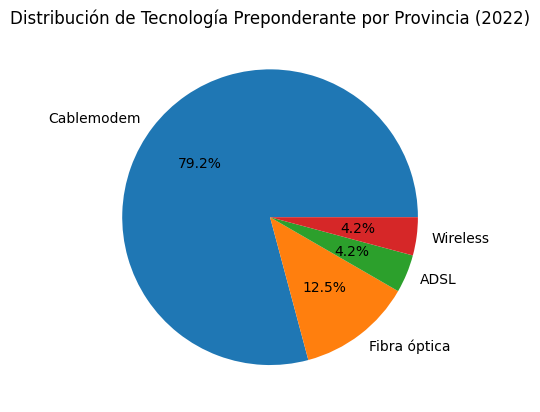

In [20]:
## Se obtiene las tecnologías únicas y contar su frecuencia
tecnologias = filtered_df['tecnologia_preponderante'].unique()
frecuencias = filtered_df['tecnologia_preponderante'].value_counts()

# se configura el gráfico de torta
fig, ax = plt.subplots()
ax.pie(frecuencias, labels=tecnologias, autopct='%1.1f%%')

ax.set_title('Distribución de Tecnología Preponderante por Provincia (2022)')

plt.show()

Se puede deducir que para el año 2022, las tecnologías más demandas son por cable modem con un 79.2% y fibra óptica con un 12.5 %.

Identificar que tecnologías no son usadas por provincia y año.

In [28]:
df_grouped[df_grouped['Minimo']  == 0 ][['Año','Provincia', 'tecnologia_preponderante']]


,Año,Provincia,tecnologia_preponderante
2,2014,Catamarca,ADSL
8,2014,Formosa,ADSL
11,2014,La Rioja,ADSL
33,2015,Jujuy,ADSL
35,2015,La Rioja,ADSL
57,2016,Jujuy,ADSL
59,2016,La Rioja,ADSL
142,2019,Tierra Del Fuego,Cablemodem
166,2020,Tierra Del Fuego,Cablemodem


Se observa que en los últimos años se utilizan en todas las provincias el servicio de internet en sus distintas modalidades, dado que el último registro de provincia sin acceso a internet fue Tierra del Fuego en el año 2020, con la modalidad de cable modem.

### 4. Conclusión <a name="id4"></a>
Actualmente todas las provincias demandan los servicios de acceso a internet, contratando la modalidad por cable modem y fibra óptica en su mayoria. La provincia de Buenos Aires concentra la mayor demanda.